In [43]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
wmt16_seg = pickle.load(open('../wmt16_sys_metadata.pkl', 'rb'))
df = wmt16_seg[wmt16_seg.lp.str.endswith('en')].copy()
df.head(1)

,lp,HITId,WorkerId,score,time,system,type,sid,reference,source,output
12300,de-en,3QQUBC64ZEEFIPT2SKINDZZTZ3SNXN,A0077,100,2052,online-A,REF,241,This would allow for appeals to be made agains...,"Sie würde es erlauben, gegen Urteile Einspruch...",It would allow it to appeal against judgments.\n


In [36]:
counts = df.groupby(['lp', 'system', 'sid'], as_index=False).count()['score']
print('total judgments: %d' % counts.sum())
print('repeats: %d' % (counts[counts > 1] - 1).sum())
print('percent examples with > 1 judgments: %f' % (np.sum(counts > 1) / len(counts)))

total judgments: 190100
repeats: 60857
percent examples with > 1 judgments: 0.445177


In [15]:
vc = df.WorkerId.value_counts()
print(len(vc))
print(np.sum(vc != 100))

705
222


Text(0.5, 1.0, '# of annotations done by workers')

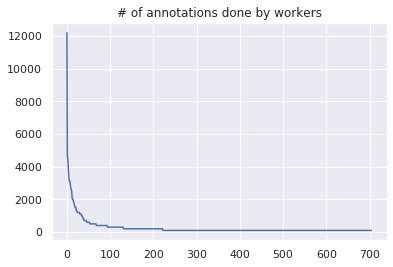

In [46]:
sns.lineplot(x=range(0, len(vc)), y=vc.tolist())
plt.title('# of annotations done by workers')

Text(0.5, 1.0, '# of annotations done by workers (annotations > 100)')

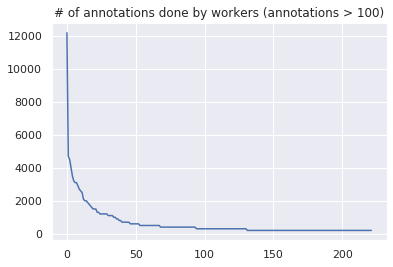

In [45]:
sns.lineplot(x=range(0, 222), y=vc.tolist()[:222])
plt.title('# of annotations done by workers (annotations > 100)')

Index(['A1573', 'A0332', 'A0542', 'A0131', 'A0896'], dtype='object')


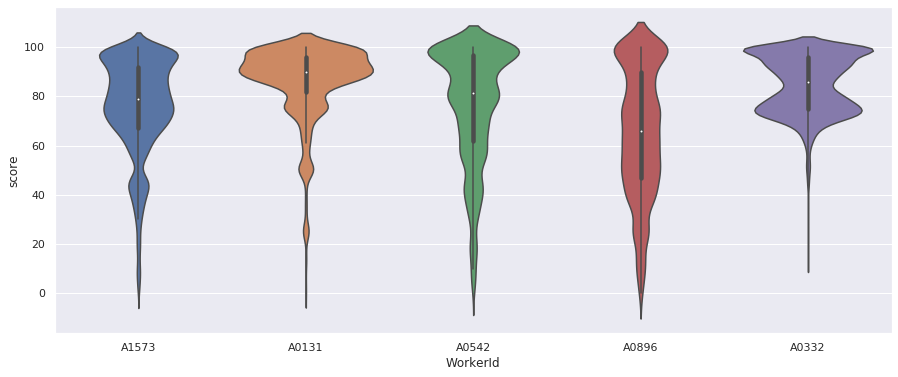

In [58]:
top_5 = vc.index[:5]
print(top_5)
df = wmt16_seg[wmt16_seg.WorkerId.isin(top_5)]
plt.figure(figsize=(15,6))
sns.violinplot(x=df.WorkerId, y=df.score)